導入數據

In [30]:
import pandas as pd

#load the data
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/'
                   'arrhythmia/arrhythmia.data', header=None, sep=',', engine='python')

display(data.head(3))

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10


數據集大小

In [31]:
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 280 columns


數據集最後一列

In [32]:
import numpy as np

np.unique(data[len(data.columns)-1])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 14, 15, 16], dtype=int64)

让我们将该列（类标签）设为二分的。
如果心电图正常，则值为 0，否则为 1

In [33]:
data['arrhythmia'] = data[len(data.columns)-1].map(lambda x: 0 if x==1 else 1)
data = data.drop(len(data.columns)-2, axis=1)

群體是否平衡

In [34]:
data.groupby(['arrhythmia']).size()

arrhythmia
0    245
1    207
dtype: int64

某些列有缺失值，以“？”表示。
为了使预处理更简单，我们只保留具有数值的列。

In [35]:
data = data._get_numeric_data()
print('%d rows and %d columns' % (data.shape[0],data.shape[1]))

452 rows and 275 columns


In [36]:
data.head(3)

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,arrhythmia
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,1
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,1
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,1


In [37]:
X = data.iloc[:, :-1]  # The first to second-last columns are the features
y = data.iloc[:, -1]   # The last column is the ground-truth label
print(np.unique(y))
print(X.shape)

[0 1]
(452, 274)


切分數據集為train和val

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# splitting the dataset to training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20181004)

In [39]:
# Standardizing the training and test datasets
# Note that we are scaling based on the information from the training data
# Then we apply the scaling that is done from training data to the test data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

訓練模型的函數

In [40]:
class LogisticRegression(object):

    def __init__(self, 
                 eta= 1, 
                 n_epoch=1000, 
                 random_state=42):
        """Feel free to change the hyperparameters"""
        self.eta = eta
        self.n_epoch = n_epoch
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            gradient_weights, gradient_bias = self.gradient(X, output, y)
            self.w_[1:] += self.eta * gradient_weights
            self.w_[0] += self.eta * gradient_bias
            cost = self.loss(output, y)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def loss(self, output, y):
        """Calculate cross entropy loss"""

        # 交叉熵損失公式
        cross_entropy = -y * np.log(output) - (1 - y) * np.log(1 - output)
        return np.mean(cross_entropy)


    def gradient(self, X, output, y):
        """Calculate the partial derivative of cross entropy loss with respect to weights"""
        errors = (y - output)
        return errors.dot(X), errors.sum()

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        
        return 1.0 / (1.0 + np.exp(-z))

    def predict(self, X):
        """Return class label after unit step"""
        probabilities = self.activation(self.net_input(X))
        return (probabilities >= 0.5).astype(int)
        


訓練

In [41]:
model = LogisticRegression(eta=0.01, n_epoch= 1500 , random_state=1)
model.fit(X_train_std, y_train)

C:\Users\11958\AppData\Local\Temp\ipykernel_45612\2032860076.py:35: RuntimeWarning: divide by zero encountered in log
  cross_entropy = -y * np.log(output) - (1 - y) * np.log(1 - output)
C:\Users\11958\AppData\Local\Temp\ipykernel_45612\2032860076.py:35: RuntimeWarning: divide by zero encountered in log
  cross_entropy = -y * np.log(output) - (1 - y) * np.log(1 - output)
C:\Users\11958\AppData\Local\Temp\ipykernel_45612\2032860076.py:35: RuntimeWarning: divide by zero encountered in log
  cross_entropy = -y * np.log(output) - (1 - y) * np.log(1 - output)
C:\Users\11958\AppData\Local\Temp\ipykernel_45612\2032860076.py:35: RuntimeWarning: divide by zero encountered in log
  cross_entropy = -y * np.log(output) - (1 - y) * np.log(1 - output)
C:\Users\11958\AppData\Local\Temp\ipykernel_45612\2032860076.py:35: RuntimeWarning: divide by zero encountered in log
  cross_entropy = -y * np.log(output) - (1 - y) * np.log(1 - output)
C:\Users\11958\AppData\Local\Temp\ipykernel_45612\2032860076.py:3

繪製損失曲線

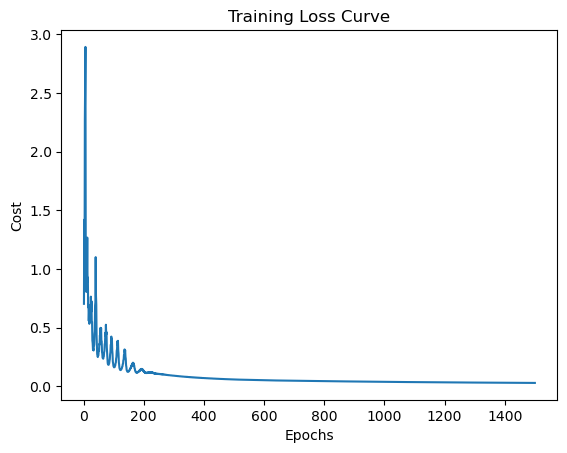

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score

# 4. 繪製訓練損失曲線
plt.plot(range(1, len(model.cost_) + 1), model.cost_)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Training Loss Curve')
plt.show()



預測與分數評估

Confusion Matrix:
[[34  9]
 [10 38]]


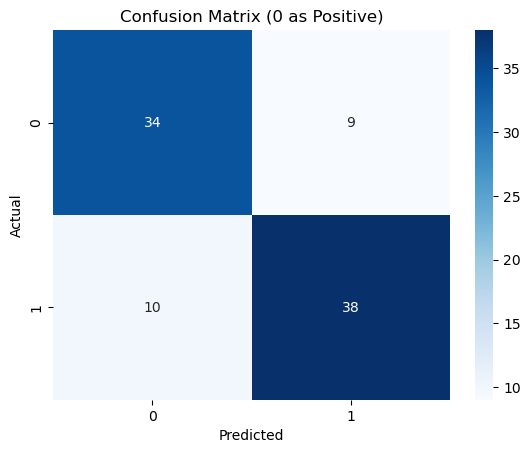

F1 Score: 0.7816


In [43]:
#預測和評估
y_pred = model.predict(X_test_std)

# 混淆矩陣
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
print("Confusion Matrix:")
print(cm)

# 可視化
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (0 as Positive)')
plt.show()

# 計算F1分數
f1 = f1_score(y_test, y_pred, pos_label=0)  # pos_label=0 表示將0作為正類
print(f"F1 Score: {f1:.4f}")

